### Example in UWG
2_15_Rayleigh-Taylor_van_Keken_et_al_1997

### Ref:
Kaus, B. J., Mühlhaus, H., & May, D. A. (2010). A stabilization algorithm for geodynamic numerical simulations with a free surface. Physics of the Earth and Planetary Interiors, 181(1-2), 12-20.

In [1]:
import UWGeodynamics as GEO
from UWGeodynamics import visualisation as vis

u = GEO.UnitRegistry

loaded rc file /opt/venv/lib/python3.7/site-packages/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
Res_mesh = (50,50)  # res = 5km
Res_real = [(-250.,250.),(-500,0.)] # Unit: km 
dt = 2500*u.year
fdir = "Kaus2010_RT_2.5ka_rs"

In [3]:
# Scaling
# test 3
# dRho =   100. * u.kilogram / u.meter**3 # matprop.ref_density
# g    =   9.81 * u.meter / u.second**2   # modprop.gravity
boxLength = 500. * u.kilometer #  modprop.boxHeight

# # lithostatic pressure for mass-time-length
# ref_stress = dRho * g * boxLength

# ref_viscosity = 1e21 * u.pascal * u.second
# KL = boxLength
# KT = ref_viscosity/ref_stress
# KM = ref_viscosity*KL*KT 

# GEO.scaling_coefficients["[time]"] = KT
# GEO.scaling_coefficients["[length]"] = KL
# GEO.scaling_coefficients["[mass]"] = KM

half_rate = 1.0 * u.centimeter / u.year
model_length = 500. * u.kilometer
bodyforce = 3200 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2

KL = model_length
Kt = KL / half_rate
KM = bodyforce * KL**2 * Kt**2

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM

In [4]:
Model = GEO.Model(elementRes=Res_mesh,
                  minCoord=(Res_real[0][0] * u.kilometer, Res_real[1][0] * u.kilometer),  
                  maxCoord=(Res_real[0][1] * u.kilometer, Res_real[1][1] * u.kilometer),
                  gravity=(0.0, -9.81 * u.meter / u.second**2))

Model.outputDir = fdir

In [5]:
import math
import underworld.function as fn

# material perturbation from van Keken et al. 1997
wavelength = GEO.nd(boxLength)
amplitude  = GEO.nd(5*u.kilometer)
offset     = GEO.nd(-100.*u.kilometer)
k = 2. * math.pi / wavelength

# Create function to return particle's coordinate
coord = fn.coord()

# Define the material perturbation, a function of the x coordinate (accessed by `coord[0]`).
perturbationFn = offset + amplitude*fn.math.cos(k*coord[0])

lightShape = perturbationFn > coord[1] 
densShape = perturbationFn < coord[1]

In [6]:
densMaterial = Model.add_material(name="Dense Material", shape=densShape)
lightMaterial = Model.add_material(name="Light Material", shape=lightShape)

In [7]:
densMaterial.density  = 3300 * u.kilogram / u.metre**3
lightMaterial.density = 3200 * u.kilogram / u.metre**3

In [8]:
densMaterial.viscosity = 1e21 * u.pascal * u.second
lightMaterial.viscosity = 1e20 * u.pascal * u.second


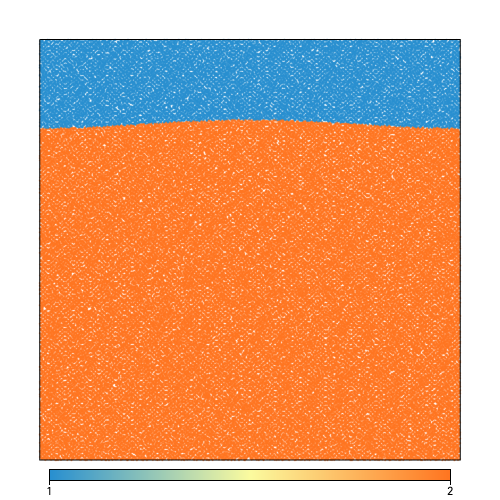

In [9]:
Fig = vis.Figure(figsize=(500, 500))
Fig.Points(Model.swarm, Model.materialField, fn_size=3.0)
Fig.save("F_Kaus2010_RT_material.png")
Fig.show()

In [10]:
Model.set_velocityBCs(left=[0, None], right=[0., None],top=[None,None],bottom=[0.,0.])

In [11]:
Model.freesurface = True

In [12]:
#Model.init_model(temperature=False, pressureField=True)

In [13]:
Model.run_for(2.0 * u.megayears, checkpoint_interval=0.1*u.megayears,dt= dt)

Running with UWGeodynamics version 2.10.1-dev-dcb2ff4(development)
Options:  -Q22_pc_type uw -ksp_type bsscr -pc_type none -ksp_k2_type NULL -rescale_equations False -remove_constant_pressure_null_space False -change_backsolve False -change_A11rhspresolve False -restore_K False -A11_ksp_type fgmres -A11_ksp_rtol 1e-06 -scr_ksp_type fgmres -scr_ksp_rtol 1e-05
Step:     1 Model Time: 2500.0 year dt: 2500.0 year (2021-09-22 12:50:55)
Step:     2 Model Time: 5000.0 year dt: 2500.0 year (2021-09-22 12:50:55)
Step:     3 Model Time: 7500.0 year dt: 2500.0 year (2021-09-22 12:50:56)
Step:     4 Model Time: 10000.0 year dt: 2500.0 year (2021-09-22 12:50:56)
Step:     5 Model Time: 12500.0 year dt: 2500.0 year (2021-09-22 12:50:57)
Step:     6 Model Time: 15000.0 year dt: 2500.0 year (2021-09-22 12:50:57)
Step:     7 Model Time: 17500.0 year dt: 2500.0 year (2021-09-22 12:50:58)
Step:     8 Model Time: 20000.0 year dt: 2500.0 year (2021-09-22 12:50:58)
Step:     9 Model Time: 22500.0 year dt: 2

Step:   105 Model Time: 260000.0 year dt: 2500.0 year (2021-09-22 12:51:51)
Step:   106 Model Time: 262500.0 year dt: 2500.0 year (2021-09-22 12:51:52)
Step:   107 Model Time: 265000.0 year dt: 2500.0 year (2021-09-22 12:51:52)
Step:   108 Model Time: 267500.0 year dt: 2500.0 year (2021-09-22 12:51:53)
Step:   109 Model Time: 270000.0 year dt: 2500.0 year (2021-09-22 12:51:53)
Step:   110 Model Time: 272500.0 year dt: 2500.0 year (2021-09-22 12:51:54)
Step:   111 Model Time: 275000.0 year dt: 2500.0 year (2021-09-22 12:51:54)
Step:   112 Model Time: 277500.0 year dt: 2500.0 year (2021-09-22 12:51:55)
Step:   113 Model Time: 280000.0 year dt: 2500.0 year (2021-09-22 12:51:55)
Step:   114 Model Time: 282500.0 year dt: 2500.0 year (2021-09-22 12:51:56)
Step:   115 Model Time: 285000.0 year dt: 2500.0 year (2021-09-22 12:51:56)
Step:   116 Model Time: 287500.0 year dt: 2500.0 year (2021-09-22 12:51:57)
Step:   117 Model Time: 290000.0 year dt: 2500.0 year (2021-09-22 12:51:58)
Step:   118 

Step:   213 Model Time: 522500.0 year dt: 2500.0 year (2021-09-22 12:52:57)
Step:   214 Model Time: 525000.0 year dt: 2500.0 year (2021-09-22 12:52:58)
Step:   215 Model Time: 527500.0 year dt: 2500.0 year (2021-09-22 12:52:58)
Step:   216 Model Time: 530000.0 year dt: 2500.0 year (2021-09-22 12:52:59)
Step:   217 Model Time: 532500.0 year dt: 2500.0 year (2021-09-22 12:52:59)
Step:   218 Model Time: 535000.0 year dt: 2500.0 year (2021-09-22 12:53:00)
Step:   219 Model Time: 537500.0 year dt: 2500.0 year (2021-09-22 12:53:00)
Step:   220 Model Time: 540000.0 year dt: 2500.0 year (2021-09-22 12:53:00)
Step:   221 Model Time: 542500.0 year dt: 2500.0 year (2021-09-22 12:53:01)
Step:   222 Model Time: 545000.0 year dt: 2500.0 year (2021-09-22 12:53:01)
Step:   223 Model Time: 547500.0 year dt: 2500.0 year (2021-09-22 12:53:02)
Step:   224 Model Time: 550000.0 year dt: 2500.0 year (2021-09-22 12:53:02)
Step:   225 Model Time: 552500.0 year dt: 2500.0 year (2021-09-22 12:53:03)
Step:   226 

Step:   321 Model Time: 787426.6 year dt: 2500.0 year (2021-09-22 12:53:51)
Step:   322 Model Time: 789926.6 year dt: 2500.0 year (2021-09-22 12:53:52)
Step:   323 Model Time: 792426.6 year dt: 2500.0 year (2021-09-22 12:53:52)
Step:   324 Model Time: 794926.6 year dt: 2500.0 year (2021-09-22 12:53:53)
Step:   325 Model Time: 797426.6 year dt: 2500.0 year (2021-09-22 12:53:53)
Step:   326 Model Time: 799926.6 year dt: 2500.0 year (2021-09-22 12:53:54)
Step:   327 Model Time: 800000.0 year dt: 73.4 year (2021-09-22 12:53:56)
Step:   328 Model Time: 802500.0 year dt: 2500.0 year (2021-09-22 12:53:56)
Step:   329 Model Time: 805000.0 year dt: 2500.0 year (2021-09-22 12:53:57)
Step:   330 Model Time: 807500.0 year dt: 2500.0 year (2021-09-22 12:53:57)
Step:   331 Model Time: 810000.0 year dt: 2500.0 year (2021-09-22 12:53:58)
Step:   332 Model Time: 812500.0 year dt: 2500.0 year (2021-09-22 12:53:58)
Step:   333 Model Time: 815000.0 year dt: 2500.0 year (2021-09-22 12:53:59)
Step:   334 Mo

Step:   430 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-22 12:54:52)
Step:   431 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-22 12:54:52)
Step:   432 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-22 12:54:53)
Step:   433 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-22 12:54:53)
Step:   434 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-22 12:54:54)
Step:   435 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-22 12:54:54)
Step:   436 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-22 12:54:55)
Step:   437 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-22 12:54:55)
Step:   438 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-22 12:54:56)
Step:   439 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-22 12:54:56)
Step:   440 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-22 12:54:57)
Step:   441 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-22 12:54:58)
Step:   442 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-22 12:54:58)
Step:   443 Model Time: 1

Step:   540 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-22 12:55:56)
Step:   541 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-22 12:55:57)
Step:   542 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-22 12:55:57)
Step:   543 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-22 12:55:58)
Step:   544 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-22 12:55:59)
Step:   545 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-22 12:55:59)
Step:   546 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-22 12:56:00)
Step:   547 Model Time: 1.4 megayear dt: 2500.0 year (2021-09-22 12:56:00)
Step:   548 Model Time: 1.4 megayear dt: 2500.0 year (2021-09-22 12:56:01)
Step:   549 Model Time: 1.4 megayear dt: 2500.0 year (2021-09-22 12:56:02)
Step:   550 Model Time: 1.4 megayear dt: 2500.0 year (2021-09-22 12:56:02)
Step:   551 Model Time: 1.4 megayear dt: 2500.0 year (2021-09-22 12:56:03)
Step:   552 Model Time: 1.4 megayear dt: 2500.0 year (2021-09-22 12:56:03)
Step:   553 Model Time: 1

Step:   650 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-22 12:57:03)
Step:   651 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-22 12:57:03)
Step:   652 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-22 12:57:04)
Step:   653 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-22 12:57:04)
Step:   654 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-22 12:57:05)
Step:   655 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-22 12:57:05)
Step:   656 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-22 12:57:06)
Step:   657 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-22 12:57:07)
Step:   658 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-22 12:57:07)
Step:   659 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-22 12:57:08)
Step:   660 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-22 12:57:08)
Step:   661 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-22 12:57:09)
Step:   662 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-22 12:57:09)
Step:   663 Model Time: 1

Step:   760 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-22 12:58:06)
Step:   761 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-22 12:58:07)
Step:   762 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-22 12:58:07)
Step:   763 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-22 12:58:08)
Step:   764 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-22 12:58:08)
Step:   765 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-22 12:58:09)
Step:   766 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-22 12:58:10)
Step:   767 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-22 12:58:11)
Step:   768 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-22 12:58:12)
Step:   769 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-22 12:58:13)
Step:   770 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-22 12:58:13)
Step:   771 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-22 12:58:14)
Step:   772 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-22 12:58:14)
Step:   773 Model Time: 1

1


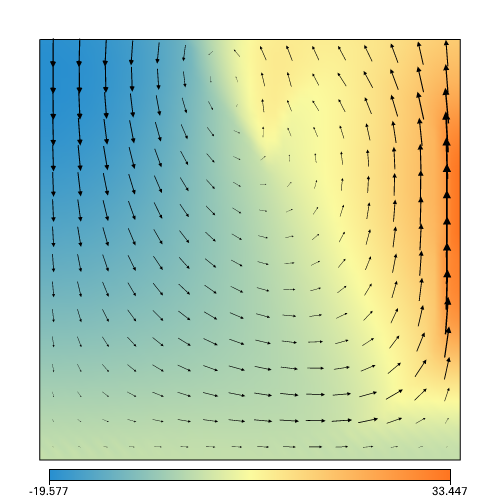

In [14]:
Fig = vis.Figure(figsize=(500, 500))
Fig.Surface(Model.mesh, Model.velocityField[1])
Fig.VectorArrows(Model.mesh, Model.velocityField)
Fig.save("Figure_2.png")
Fig.show()


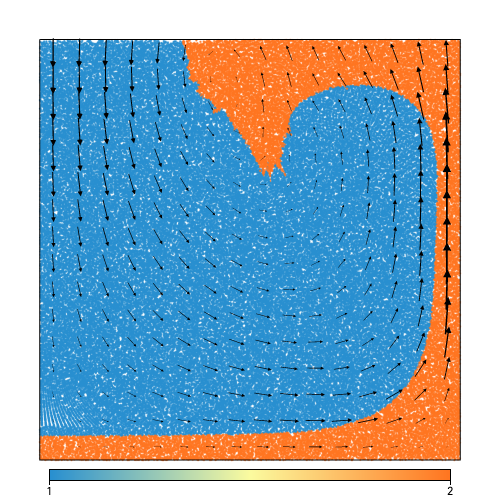

In [15]:
Fig = vis.Figure(figsize=(500, 500))
Fig.Points(Model.swarm, Model.materialField, fn_size=3.0)
Fig.VectorArrows(Model.mesh, Model.velocityField)
Fig.save("Figure_3.png")
Fig.show()


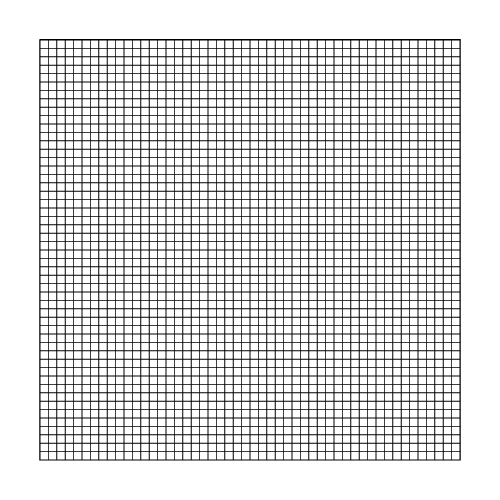

In [16]:
Fig = vis.Figure(figsize=(500, 500))
Fig.Mesh(Model.mesh, fn_size=3.0)
#Fig.VectorArrows(Model.mesh, Model.velocityField)
Fig.save("Figure_mesh_3.png")
Fig.show()

In [17]:
Model.mesh.data

array([[-0.5 ,  0.  ],
       [-0.48,  0.  ],
       [-0.46,  0.  ],
       ..., 
       [ 0.46,  1.  ],
       [ 0.48,  1.  ],
       [ 0.5 ,  1.  ]])